In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

dataHeap = pd.read_csv('./bruteforce-heap.csv')
dataArray = pd.read_csv('./bruteforce-array.csv')

In [3]:
dataHeap = pd.read_csv('./bruteforce-heap.csv')
dataArray = pd.read_csv('./bruteforce-array.csv')
dataHeap

,Processes,Time,CPUutil,Throughput,AvgWaiting
0,1000,0.55,99.82,1833,0.00
1,2000,1.09,99.91,1835,0.00
2,3000,1.66,99.91,1806,0.00
3,4000,2.21,99.91,1813,0.00
4,5000,2.77,99.87,1802,0.01
5,6000,3.32,99.84,1809,0.01
6,7000,3.90,99.73,1793,0.01
7,8000,4.43,99.83,1805,0.01
8,9000,4.97,99.79,1811,0.01
9,10000,5.50,99.83,1820,0.01


In [34]:
dataHeap = pd.read_csv('./bruteforce-heap.csv')[:40]
dataArray = pd.read_csv('./bruteforce-array.csv')[:40]

# meanHeap = dataHeap.describe().loc['mean']
# dataHeap = dataHeap.append(meanHeap.rename('Average'))
merge = pd.merge(dataHeap, dataArray, on='Processes', how='outer')
merge.describe().loc[['mean', 'max']]

,Processes,Time_x,Time_y
mean,102500.0,0.35575,1.1075
max,200000.0,0.80000,3.5300


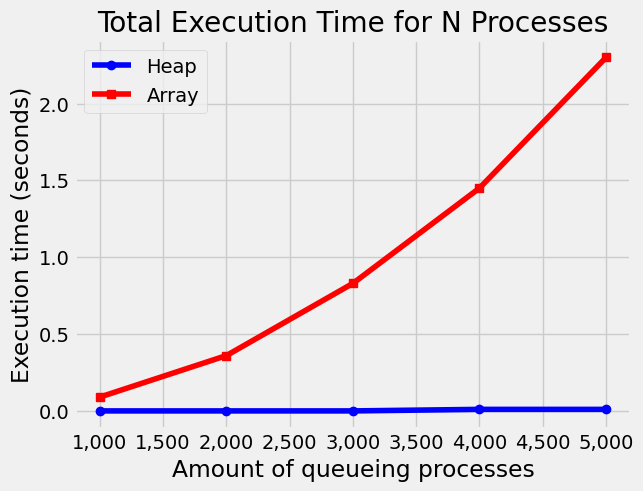

In [13]:
dataHeap = pd.read_csv('./bruteforce-heap.csv')[:5]
dataArray = pd.read_csv('./bruteforce-array.csv')[:5]
dataHeap = dataHeap
dataArray = dataArray

# Define a custom formatting function for the integers on the x-axis
def format_func(value, tick_number):
    # Convert the integer value to a formatted string
    return f'{int(value):,d}'  # Formats the integer with comma as thousand separator

plt.plot(dataHeap['Processes'], dataHeap['Time'], label='Heap', color='blue', marker='o')
plt.plot(dataArray['Processes'], dataArray['Time'], label='Array', color='red', marker='s')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

plt.title('Total Execution Time for N Processes')
plt.ylabel('Execution time (seconds)')
plt.xlabel('Amount of queueing processes')
plt.legend()

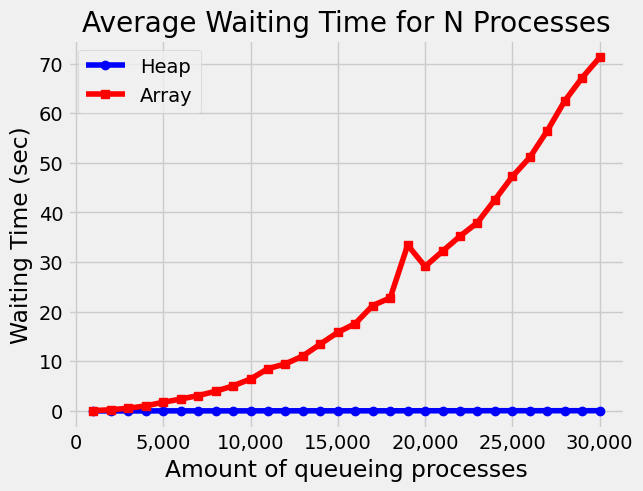

In [16]:
dataHeap = pd.read_csv('./bruteforce-heap.csv')
dataArray = pd.read_csv('./bruteforce-array.csv')

# Define a custom formatting function for the integers on the x-axis
def format_func(value, tick_number):
    # Convert the integer value to a formatted string
    return f'{int(value):,d}'  # Formats the integer with comma as thousand separator
def format_funcY(value, tick_number):
    # Convert the integer value to a formatted string
    return f'{int(value)}%'  # Formats the integer with comma as thousand separator

plt.plot(dataHeap['Processes'], dataHeap['AvgWaiting'], label='Heap', color='blue', marker='o')
plt.plot(dataArray['Processes'], dataArray['AvgWaiting'], label='Array', color='red', marker='s')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
# plt.gca().yaxis.set_major_formatter(FuncFormatter(format_funcY))

plt.title('Average Waiting Time for N Processes')
plt.ylabel('Waiting Time (sec)')
plt.xlabel('Amount of queueing processes')
plt.legend()